# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned_book_ratings.csv")
print("Shape:", df.shape)

Shape: (145264, 10)


In [3]:
df.head()

,Unnamed: 0,user_id,isbn,book_rating,location,user_age,title,author,year,publisher
0,13,276747,0060517794,9,"iowa city, iowa, usa",25.0,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch
1,16,276747,0671537458,9,"iowa city, iowa, usa",25.0,Waiting to Exhale,Terry McMillan,1995,Pocket
2,17,276747,0679776818,8,"iowa city, iowa, usa",25.0,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA
3,27,276762,0380711524,5,"duisburg, nordrhein-westfalen, germany",25.0,See Jane Run,Joy Fielding,1992,Avon
4,36,276762,3453092007,8,"duisburg, nordrhein-westfalen, germany",25.0,Die zweite Haut.,Dean Koontz,1995,Heyne


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

# Basic Info

In [5]:
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing values:
 user_id        0
isbn           0
book_rating    0
location       0
user_age       0
title          0
author         0
year           0
publisher      0
dtype: int64

Data types:
 user_id          int64
isbn            object
book_rating      int64
location        object
user_age       float64
title           object
author          object
year             int64
publisher       object
dtype: object


# EDA

# Ratings Distribution

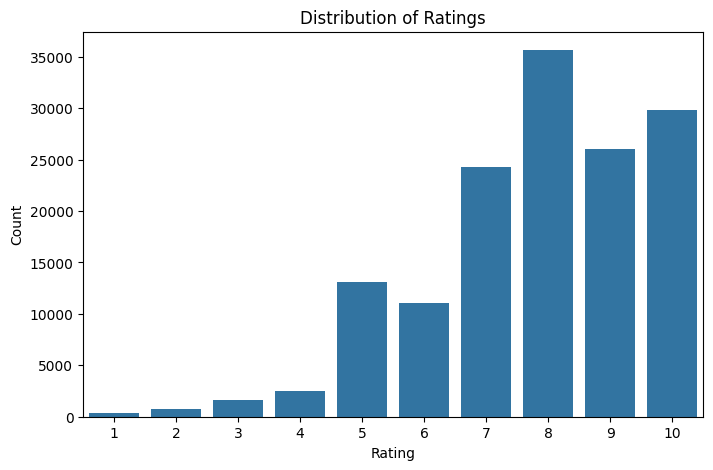

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x="book_rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top 10 Most Rated Books VS Worst Books 

In [72]:
books_state = df.groupby(['isbn','title']).agg(
    avg_rating = ('book_rating','mean'),
    rating_count = ('book_rating','count')
).reset_index()
books_state

,isbn,title,avg_rating,rating_count
0,0002005018,Clara Callan,7.000000,3
1,0002116286,There's A Seal in my Sleeping Bag,7.000000,3
2,0002240114,The Dixon Cornbelt League and other baseball s...,7.000000,2
3,0002244098,Dust to dust: Stories,7.000000,2
4,0002251760,The Forgetting Room: A Fiction (Byzantium Book),8.800000,5
...,...,...,...,...
26458,9727110800,O Diario De Um Mago,10.000000,1
26459,9812327975,Notes From an Even Smaller Island,8.500000,2
26460,9871106181,El Club Dumas,7.000000,1
26461,9871138148,Cien Anos de Soledad / One Hundred Years of So...,8.800000,5


In [73]:
# top 10 books 
top_books = books_state.sort_values(by='rating_count',ascending=False).head(10)
top_books

,isbn,title,avg_rating,rating_count
4218,0316666343,The Lovely Bones: A Novel,8.248101,395
8266,0385504209,The Da Vinci Code,8.531987,297
23078,0971880107,Wild Animus,4.118519,270
16642,0671027360,Angels &amp; Demons,8.140704,199
15748,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,8.979275,193
3351,0312195516,The Red Tent (Bestselling Backlist),8.312169,189
822,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,7.967391,184
2725,0142001740,The Secret Life of Bees,8.519774,177
4702,0345337662,Interview with the Vampire,7.779762,168
20597,0786868716,The Five People You Meet in Heaven,7.981928,166


C:\Users\acer\AppData\Local\Temp\ipykernel_7580\2766451140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_books.title, x=top_books.rating_count, palette="viridis")


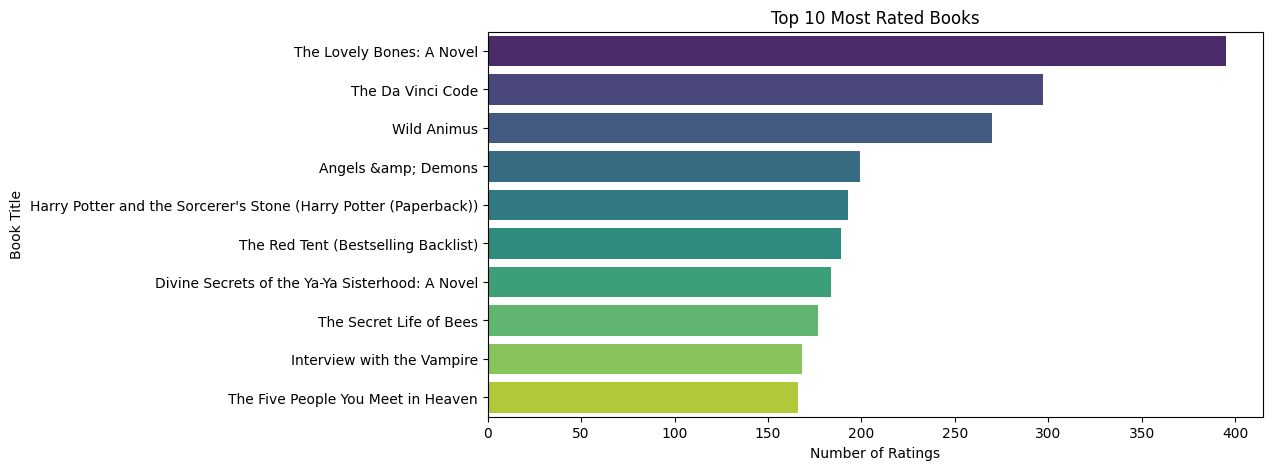

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_books.title, x=top_books.rating_count, palette="viridis")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_7580\3333658719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_books.title, x=top_books.avg_rating, palette="viridis")


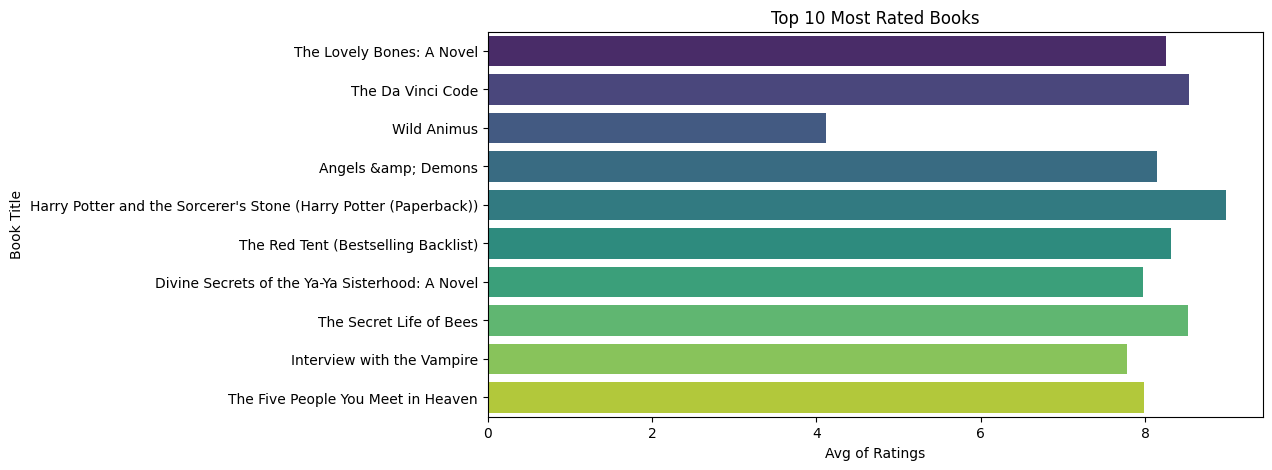

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_books.title, x=top_books.avg_rating, palette="viridis")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Avg of Ratings")
plt.ylabel("Book Title")
plt.show()

# Top 10 Authors by Ratings

In [9]:
top_authors = df['author'].value_counts().head(10)
print("\nTop 10 Authors:\n", top_authors)


Top 10 Authors:
 author
Stephen King          3011
Nora Roberts          1916
John Grisham          1388
James Patterson       1366
J. K. Rowling         1226
Dean R. Koontz         937
Janet Evanovich        900
Anne Rice              867
Mary Higgins Clark     863
Dan Brown              726
Name: count, dtype: int64


# User Age Distribution

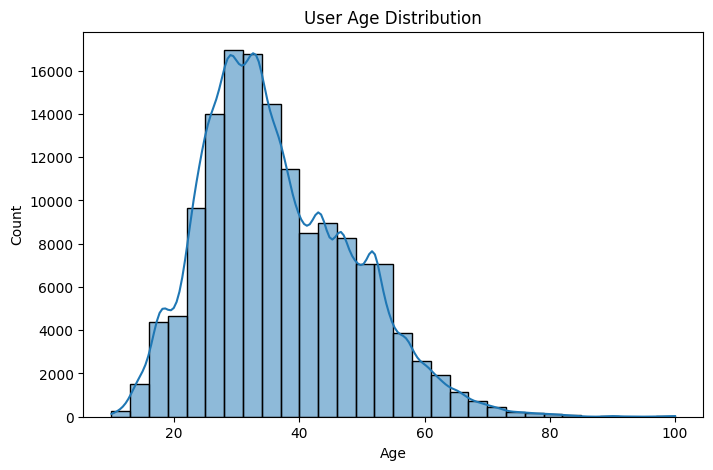

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['user_age'].dropna(), bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Average Rating by Year of Publication

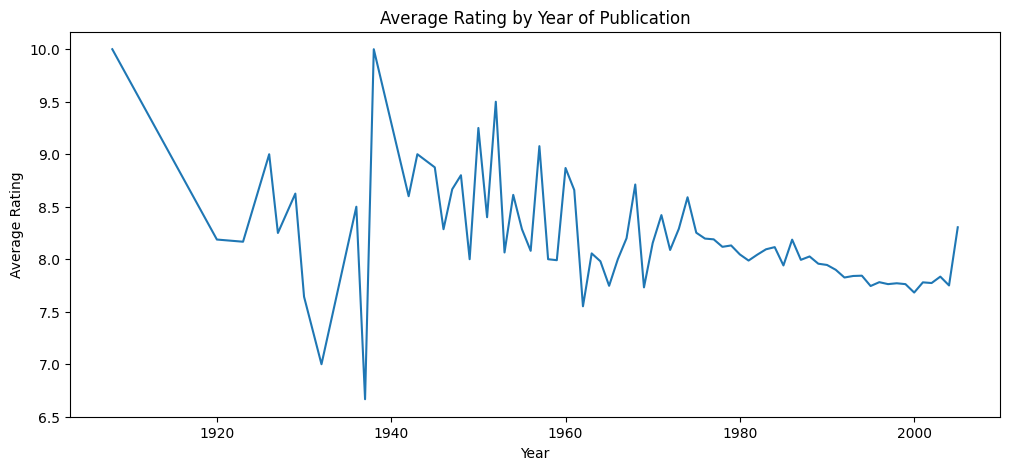

In [11]:
avg_rating_year = df.groupby("year")["book_rating"].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x="year", y="book_rating", data=avg_rating_year)
plt.title("Average Rating by Year of Publication")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

# Top 10 Countries with Most Users

In [12]:
top_countries = df['location'].value_counts().head(10)
print("\nTop 10 Countries:\n", top_countries)


Top 10 Countries:
 location
toronto, ontario, canada         2462
morrow, georgia, usa             1789
chicago, illinois, usa           1435
ottawa, ontario, canada          1135
mechanicsville, maryland, usa    1119
seattle, washington, usa         1072
portland, oregon, usa            1001
san antonio, texas, usa           875
calgary, alberta, canada          853
st. louis, missouri, usa          839
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_7580\1047641188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")


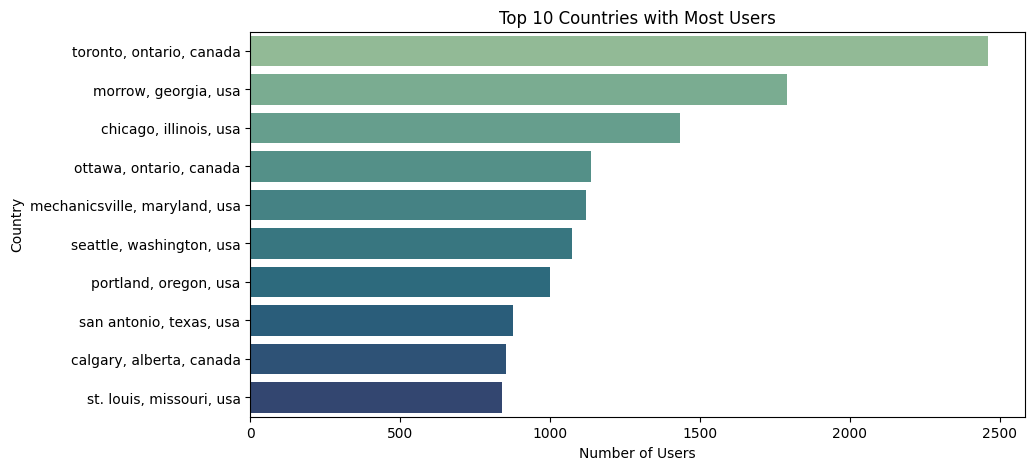

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.show()

# Top 10 Locations by Average Rating

C:\Users\acer\AppData\Local\Temp\ipykernel_7580\976006046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")


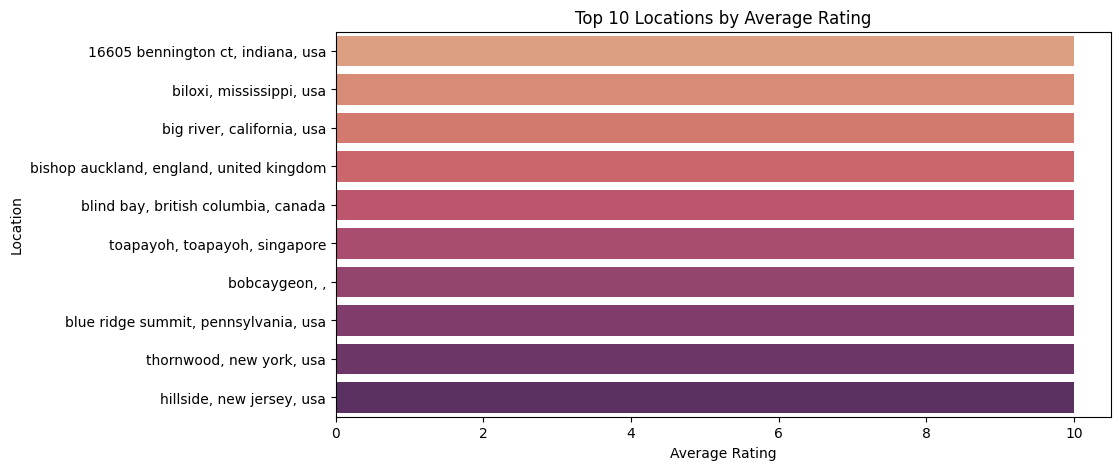

In [14]:
avg_rating_loc = df.groupby("location")["book_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")
plt.title("Top 10 Locations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

# Correlation Heatmap

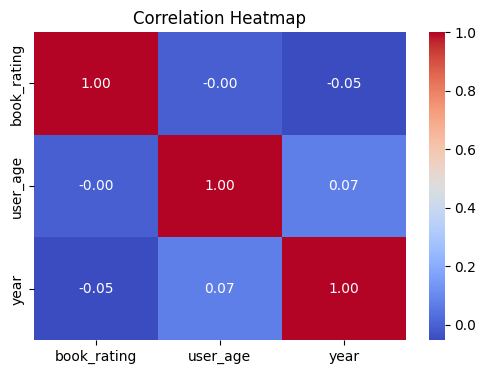

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['book_rating','user_age','year']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#  Distribution of Ratings by Age Groups (Boxplot)

C:\Users\acer\AppData\Local\Temp\ipykernel_7580\2581296430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")


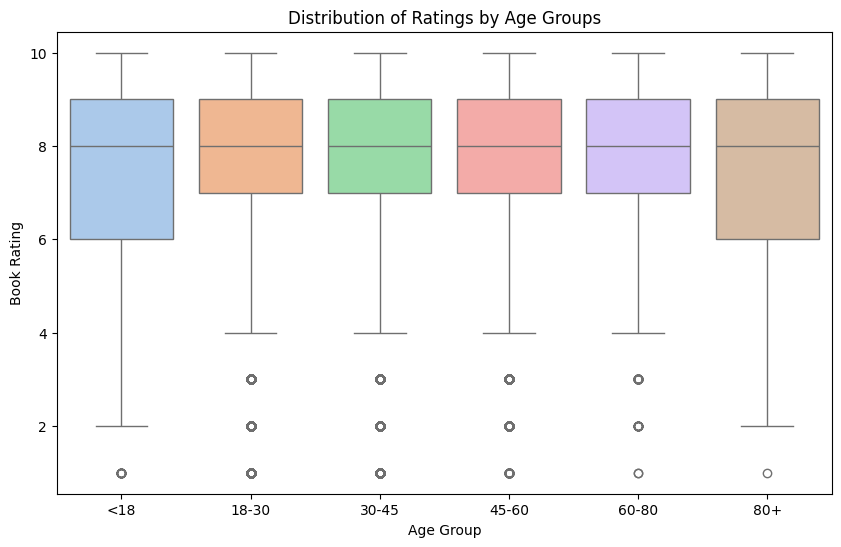

In [16]:
# Create age groups
df['age_group'] = pd.cut(df['user_age'], bins=[0,18,30,45,60,80,100], labels=['<18','18-30','30-45','45-60','60-80','80+'])

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")
plt.title("Distribution of Ratings by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Book Rating")
plt.show()


# Top 15 Publishers by Number of Books (Horizontal Barplot)

C:\Users\acer\AppData\Local\Temp\ipykernel_7580\3112309720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")


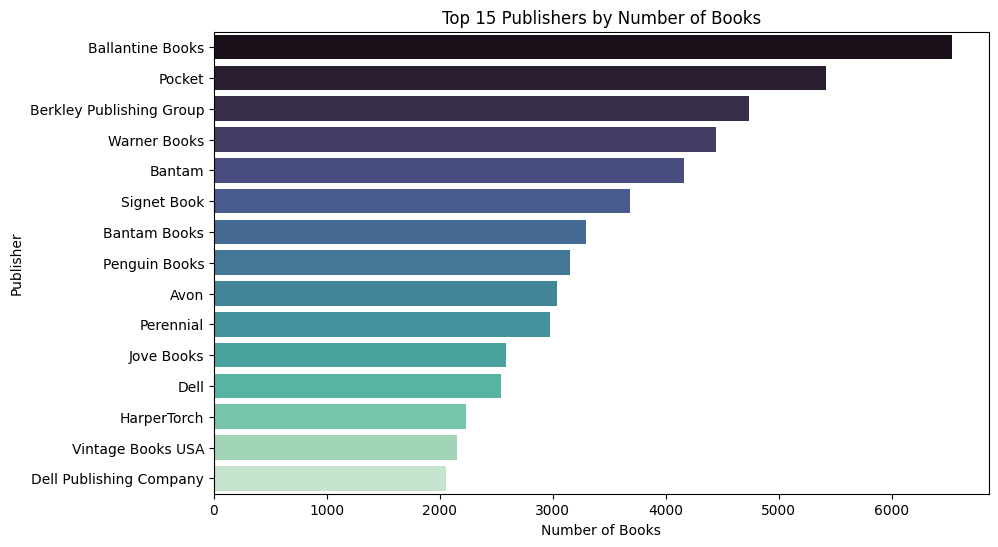

In [17]:
top_publishers = df['publisher'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")
plt.title("Top 15 Publishers by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()


# Scatterplot: User Age vs Book Rating (with transparency)

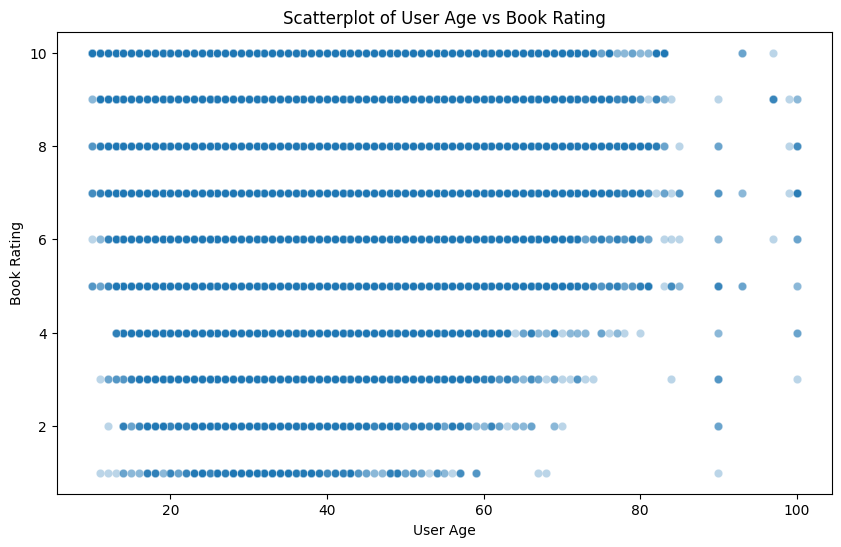

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_age', y='book_rating', data=df, alpha=0.3)
plt.title("Scatterplot of User Age vs Book Rating")
plt.xlabel("User Age")
plt.ylabel("Book Rating")
plt.show()
